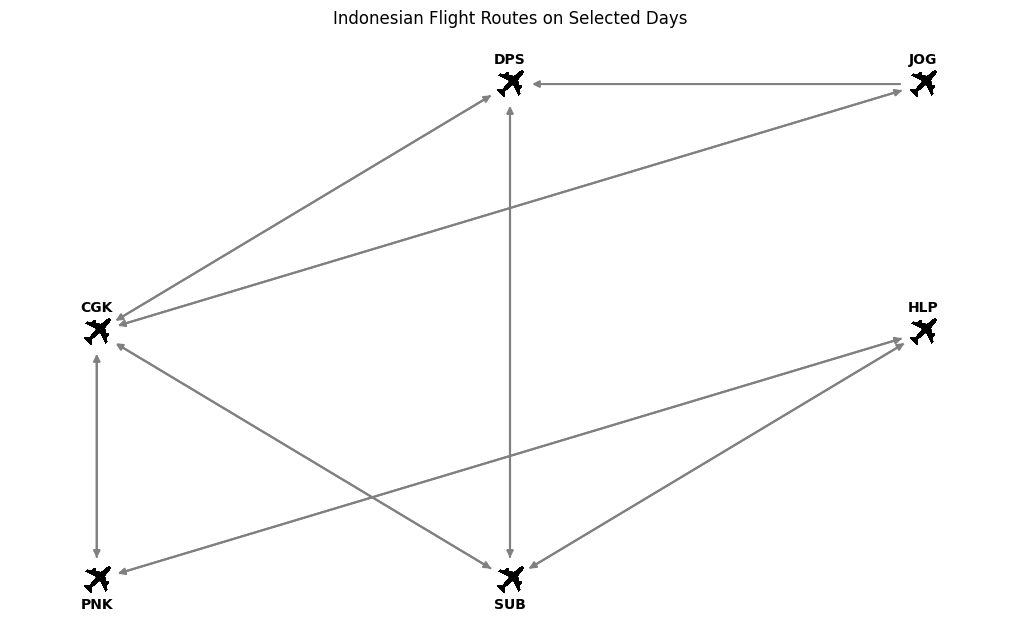

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

airports = {
    'CGK': ['DPS', 'SUB', 'PNK', 'JOG'],
    'DPS': ['CGK', 'SUB'],
    'SUB': ['CGK', 'DPS', 'HLP'],
    'HLP': ['SUB', 'PNK'],
    'PNK': ['CGK', 'HLP'],
    'JOG': ['CGK','DPS']
}

G = nx.DiGraph()

G.add_nodes_from(airports.keys())

for source, destinations in airports.items():
    for destination in destinations:
        G.add_edge(source, destination)

plane_image = plt.imread('plane.png')

plt.figure(figsize=(10, 6))

pos = {
    'CGK': (0.2, 0.5),
    'DPS': (0.5, 0.8),
    'SUB': (0.5, 0.2),
    'HLP': (0.8, 0.5),
    'PNK': (0.2, 0.2),
    'JOG': (0.8, 0.8)
}

def plot_plane(ax, x, y, size):
    im = OffsetImage(plane_image, zoom=size)
    ab = AnnotationBbox(im, (x, y), frameon=False, pad=0)
    ax.add_artist(ab)


nx.draw(G, pos, with_labels=False, node_size=1000, font_size=10, node_color="white", font_color='black', font_weight='bold', edge_color='gray', width=1.5, arrows=True)

plane_positions = {
    'CGK': (0.2, 0.5),
    'DPS': (0.5, 0.8),
    'SUB': (0.5, 0.2),
    'HLP': (0.8, 0.5),
    'PNK': (0.2, 0.2),
    'JOG': (0.8, 0.8)
}
for node, (x, y) in plane_positions.items():
    plot_plane(plt.gca(), x, y, size=0.05)


label_positions = {
    'CGK': (0.2, 0.53),
    'DPS': (0.5, 0.83),
    'SUB': (0.5, 0.17),
    'HLP': (0.8, 0.53),
    'PNK': (0.2, 0.17),
    'JOG': (0.8, 0.83)
}
for node, (x, y) in label_positions.items():
    plt.text(x, y, node, color='black', ha='center', va='center', fontweight='bold')


plt.title("Indonesian Flight Routes on Selected Days")
plt.show()


Strongly Connected Components:
['CGK', 'DPS', 'SUB', 'HLP', 'PNK', 'JOG']


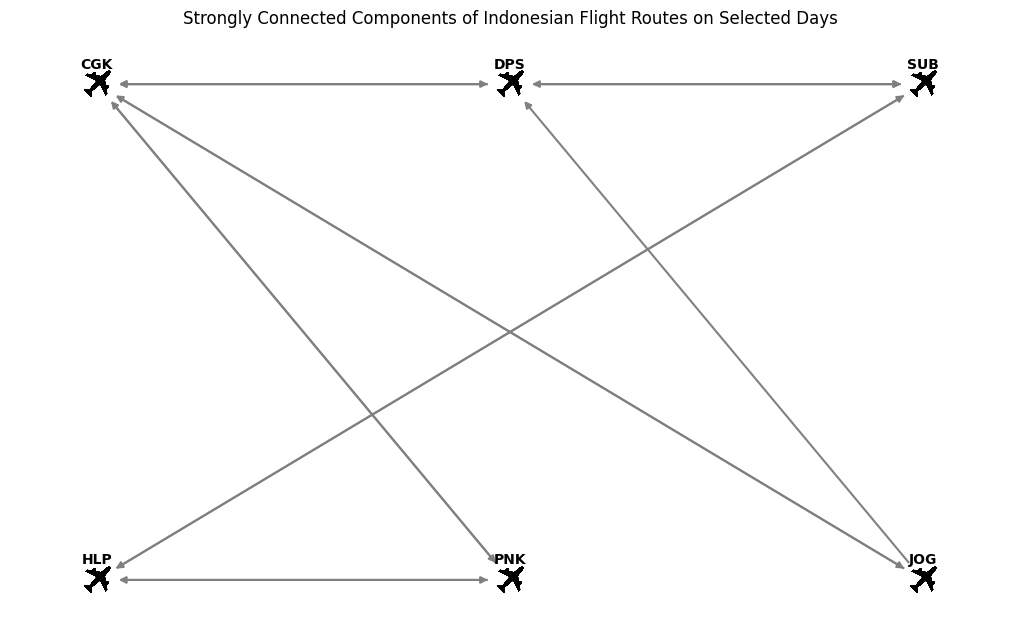

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def kosaraju(graph):
    visited = set()
    stack = []

    def dfs1(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs1(neighbor)
        stack.append(node)

    for node in graph:
        if node not in visited:
            dfs1(node)

    reversed_graph = {node: [] for node in graph}

    for node in graph:
        for neighbor in graph[node]:
            reversed_graph[neighbor].append(node)

    visited.clear()
    components = []

    def dfs2(node, component):
        visited.add(node)
        component.append(node)
        for neighbor in reversed_graph[node]:
            if neighbor not in visited:
                dfs2(neighbor, component)

    while stack:
        node = stack.pop()
        if node not in visited:
            component = []
            dfs2(node, component)
            components.append(component)

    return components

flight_routes = {
    'CGK': ['DPS', 'SUB', 'PNK', 'JOG'],
    'DPS': ['CGK', 'SUB'],
    'SUB': ['CGK', 'DPS', 'HLP'],
    'HLP': ['SUB', 'PNK'],
    'PNK': ['CGK', 'HLP'],
    'JOG': ['CGK','DPS']
}

G = nx.DiGraph(flight_routes)

components = kosaraju(flight_routes)
print("Strongly Connected Components:")
for component in components:
    print(component)

plane_image = plt.imread('plane.png')

plt.figure(figsize=(10, 6))

pos = {
    'CGK': (0.1, 0.8),
    'DPS': (0.4, 0.8),
    'SUB': (0.7, 0.8),
    'HLP': (0.1, 0.3),
    'PNK': (0.4, 0.3),
    'JOG': (0.7, 0.3)
}

def plot_plane(ax, x, y, size):
    im = OffsetImage(plane_image, zoom=size)
    ab = AnnotationBbox(im, (x, y), frameon=False, pad=0)
    ax.add_artist(ab)

nx.draw(G, pos, with_labels=False, node_size=1000, node_color='white', font_size=10, font_color='black', font_weight='bold', edge_color='gray', width=1.5, arrows=True)

for node, (x, y) in pos.items():
    plot_plane(plt.gca(), x, y, size=0.05)

    plt.text(x, y + 0.02, node, color='black', ha='center', va='center', fontweight='bold')

plt.title("Strongly Connected Components of Indonesian Flight Routes on Selected Days")
plt.show()
